In [8]:
%pip install numpy
%pip install tifffile
%pip install cellpose
%pip install matplotlib
%pip install scikit-image 
%pip install opencv-python 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/77/df/b56175c3fb5bc058774bdcf35f5a71cf9c3c5b909f98a1c688eb71cd3b1f/opencv_python-4.9.0.80-cp37-abi3-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 7.1 MB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.


In [11]:
import cv2
import numpy as np
from tifffile import imread
from cellpose import models, io
import matplotlib.pyplot as plt
from skimage import filters, measure, morphology, feature, color


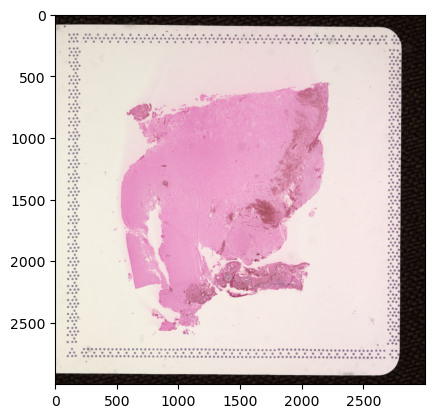

In [5]:
image_path = 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_image.tif'
image = imread(image_path)
plt.imshow(image)
plt.show()

In [6]:
model = models.Cellpose(gpu=False, model_type='cyto')

100%|██████████| 25.3M/25.3M [04:07<00:00, 107kB/s] 
100%|██████████| 5.23k/5.23k [00:00<00:00, 1.14MB/s]


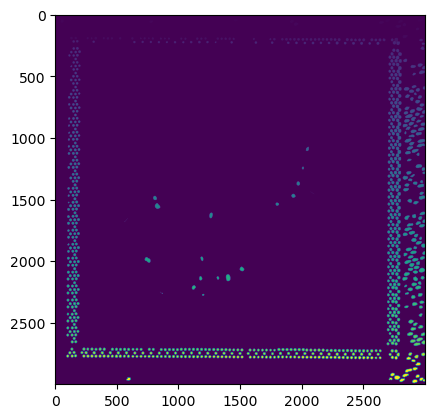

In [7]:
channels = [0,0]
masks, flows, styles, diams = model.eval(image, diameter=None, channels=channels)

plt.imshow(masks)
plt.show()


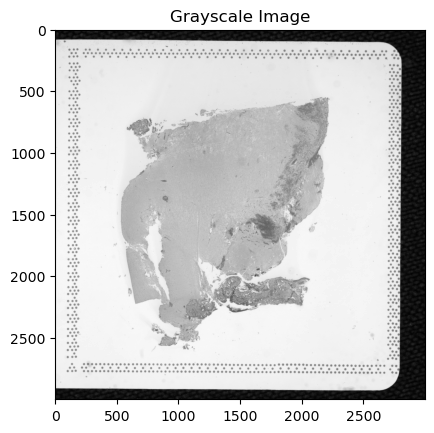

In [12]:
image_path = 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_image.tif'
image = imread(image_path)

if len(image.shape) > 2:
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
else:
    image_gray = image

plt.imshow(image_gray, cmap='gray')
plt.title("Grayscale Image")
plt.show()

# Grayscale Thresholding

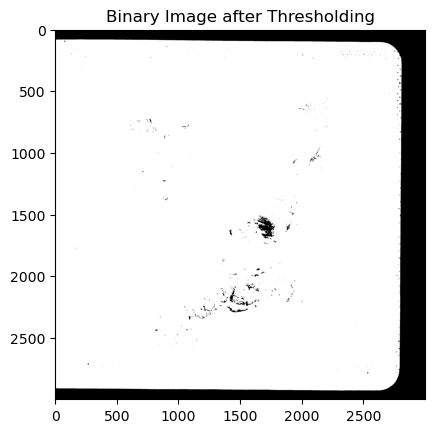

In [13]:
thresh = filters.threshold_otsu(image_gray)
binary = image_gray > thresh

plt.imshow(binary, cmap='gray')
plt.title("Binary Image after Thresholding")
plt.show()

# Geometry-Based Segmentation

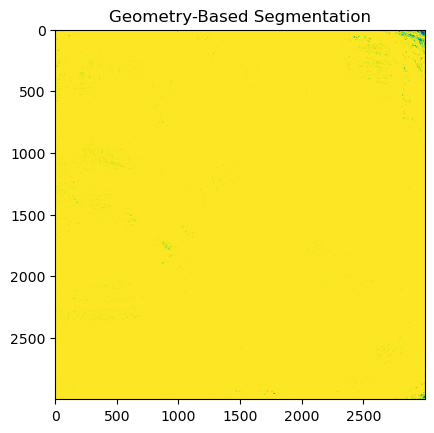

In [14]:
circles = cv2.HoughCircles(image_gray, cv2.HOUGH_GRADIENT, 1, 20,
                           param1=50, param2=30, minRadius=0, maxRadius=0)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        cv2.circle(image_gray, (i[0],i[1]), i[2], (255,0,0), 2)

plt.imshow(image_gray)
plt.title("Geometry-Based Segmentation")
plt.show()

# Color-Based Segmentation

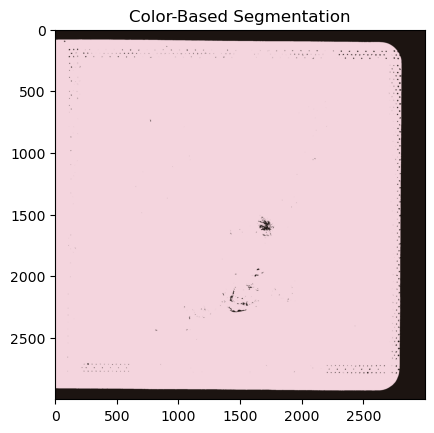

In [15]:
Z = image.reshape((-1,3))
Z = np.float32(Z)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
_,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((image.shape))

plt.imshow(result_image)
plt.title("Color-Based Segmentation")
plt.show()

# Texture-Based Segmentation

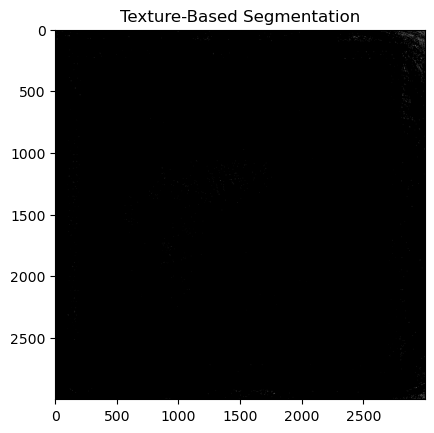

In [16]:
filt_real, filt_imag = filters.gabor(image_gray, frequency=0.6)

thresh = filters.threshold_otsu(filt_real)
binary_texture = filt_real > thresh

plt.imshow(binary_texture, cmap='gray')
plt.title("Texture-Based Segmentation")
plt.show()

# Post-processing

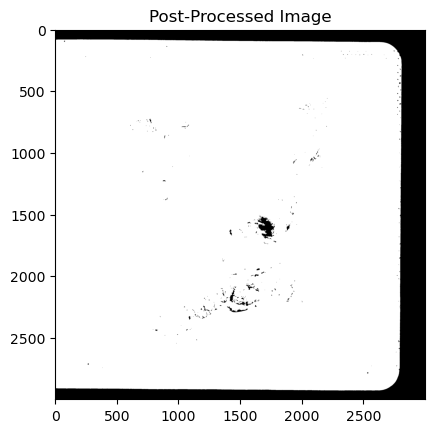

In [17]:
cleaned = morphology.remove_small_objects(binary, min_size=100)
cleaned = morphology.binary_closing(cleaned)

plt.imshow(cleaned, cmap='gray')
plt.title("Post-Processed Image")
plt.show()